# Exercice 1

## Analyse des métriques proposées pas les stagiaires (spoiler : on peut mieux faire)


### Analyse de la précision :
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Cette metrique est souvent la première montrée dans tous les projets d'apprentissage. Si on prend l'exemple d'un classificateur de photo chat/chien, la précision représente le pourcentage de photo reconnue comme chat et qui sont effectivement des félins (\#teamchat) et le nombre de photos chien et qui sont effectivement des canidés. Dans le cadre d'un algorithme multi classe la précision n'est simplement que la moyenne des précisions de toutes les classes. Dans notre cas nous avons donc 88,3% des intentions qui sont bien attribuée dans leur classes. Ce chiffre est plutôt élevé et donc de prime abord il semble que le modèle soit bon. Mais ne nous laissons pas avoir. Quid de l'état pour chaque classe ? Y a t il des disparité ? Le dataset est il équilibré ? Sans cette information capitale la précision ne vaut pas grand chose (si on a 90% d'image de chien dans un dataset et que je suis un algorithme qui répond tout le temps chien lorsque je vois une image, ma précision vaudra 90%, trop fort !). Avec cet exemple on voit bien que sans visualisation préalable des données cette valeur élevée ne vaut pas grand chose.

### Analyse du recall 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Que signifie recall ? Rappel ! Le recall est en fait le pourcentage d'intention correctement classée par rapport au total d'intention qui appartiennent à la classe. Pour un système multi-classe, là encore, le recall correspond à la moyenne de recall de chaque classe. Cette donnée est très importante et va de pair avec la précision précédemment étudiée. Par exemple si on reprend l'exemple précédemment énoncé (l'algorithme qui ne dit que chien), on remarque que l'on aura alors un recall de 100\% pour la classe chien mais un recall de 0\% pour la classe chat. En moyennant (la moyenne n'est d'ailleurs peut être pas la meilleure chose à faire ici, notez l'ouverture vers un point qui sera **développé plus bas**)on obtient un recall de 50\%. Ce chiffre désastreux contraste fortement avec son homologue 90\% et nous montre bien toute l'importance du recall quant à la démonstration de la qualité du modèle. Le recall fourni par le README fait état d'une valeur de 66\% ce qui est assez bas et qui est bien différent des 88\% de précision. On peut donc en déduire que certaines classes doivent donc être moins bien traitée que d'autre. Mais alors (reprise de l'ouverture) il faudrait afficher le recall propre à chaque à classe et vérifier l'équilibre des données (en fait le dataset est très déséquilibré, 66\% des données sont classifiées irrelevant ce qui rend très probable l'hypothèse de lacune dans certaines classes). 
    

### Analyse de la métrique F1

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Le recall et la précision ont la même importance dans le calcul du $F_{1}$. Ce score va avoir le rôle de synthétiser à la fois les valeurs de recall et de précision. Cet indicateur peut être intéressant. Cependant dans notre cas on a vu que le recall avait beaucoup plus d'importance que la précision. Ainsi cet indicateur va donc nous donner une aide plutôt limitée mais qui est qui est là quand même. On pourrait donc utiliser une autre valeur pour le beta du fbeta score, qui refleterait l'importance que l'on accorde au recall. Il s'agirait alors d'une métrique encore plus pertinente vu le déséquilibre du dataset (66% du volume des données est dans la classe *irrelevant*)

## Analyses et visualisations manquantes

### Analyses manquantes:
Nous avons listé plusieurs analyses qui pourraient nous aider à mieux évaluer notre modèle :
1. Utiliser un $F_{2}$ score plutôt qu'un $F_{1}$ score?
    * Ce score correspondrait à un compromis entre le recall et la précision. Cependant l'avantage du $F_{2}$ sur le $F_{1}$ est qu'il met plus en lumière la partie recall. Ainsi on mettrait donc en avant un chiffre qui résume grossièrement les performances du modèles sur des métriques qui sont plus intéressantes pour notre problème.

2. Un tableau présentant le recall pour chaque classe et la précision pour chaque classe
    * Ce tableau permettrait de repérer les classes à problèmes. On a vu dans notre analyse en haut que le recall moyen n'était pas très bon, et on en avait déduit qu'il y avait certainement certaines classe qui posaient problème. Grâce à ces tableaux nous pourrions repérer explicitement ces classes.
    * Dans le cadre d'une démonstration de fonctionnement cette métrique montre au client que le produit n'alloue pas moins d'importance à certaine classe (il n'est pas très fort sur une partie des classe ce qui lui permet d'avoir une bonne moyenne, alors qu'il est proche du  niveau 0 sur d'autres classes).

3. Une matrice de confusion
    * Cette matrice permettrait pour chaque classe de représenter les réponses données par l'algorithme en comparaison avec les résultats attendus pour chaque classes. Il serait alors intéressant d'étudier d'éventuelles disparités dans les classes (imaginons l'exemple où 80\% des *find-train* sont classés dans *irrelevant*). Ce travail permettrait d'approfondir les résultats obtenus avec la méthode précédente (on se focaliserai sur les classes repérées grâce à leur recall insuffisant)
    
4. Une courbe AUC-ROC
    * L'un des objectifs est d'obtenir le meilleur coefficient de threshold possible. Pour ce faire une courbe montrant l'évolution du taux de Vrai positif par rapport au taux de Faux positif serait quelque chose qui pourrait être idoine. C'est justement le rôle de la courbe AUC-ROC. Cette métrique permettrait donc pour le développeur de choisir le meilleur threshold possible, mais aussi de prouver l'efficacité de son seuillage. Il montrerait que le seuillage n'est pas trop fort (trop d'intent classé comme irrelevant) ni trop faible (trop d'intent classés dans des cases ne correpondant pas mais différentes d'irrelevant). Dans le cadre de l'exercice avoir un seuil bien posé est donc quelque chose de vital et critique pour l'application. En effet le client veut un algorithme qui puisse aider le plus possible l'utilisateur, mais il a aussi préciser qu'il veut éviter les redirections vers de mauvais formulaire, préférant un irrelevant à un mauvais formulaire. Bien placé, le threshold revient donc à équilibrer à la fois l'aide à l'utilisateur et l'évitement d'envoi de formulaire innaproprié.

5. La métrique Cleymevin (invention)
    * Cette métrique permettrait de pousser un peu plus loin l'analyse proposée par le courbe AUC-ROC. Cette métrique mesurerait en fait pour chaque classe le nombre de réponse qui ont amené la génération d'un mauvais formulaire. Cette métrique répond directement à la problématique énoncé par le client (à savoir éviter la génération d'un mauvais formulaire, quitte à faire appel à un opérateur humain). Elle permet de mettre sous silence les irrelevant qui "gênent" moins dans expérience utilisateur.

<!-- Matrice de confusion
-> Matrice des recalls et des précisions
-> Courbe AUC-ROC
-> fbeta avec beta > 1  => f2 score -->

### Visualisations manquantes

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Analyser et étudier les données sur lesquelles sont réalisés les tests est vital pour la bonne réalisation du projet. Pour pouvoir comprendre comment ces données fonctionnent il est possible d'ajouter la mesure d'un nombre d'utérrance. Ce nombre indiquerait la taille de données sur laquelle l'algorithme s'entraîne. Cela permettrait de donner une bonne indication sur le degré de précision pouvant être atteint par l'algorithme sur chaque classe (on aura pas les mêmes attentes si on peut s'entraîner sur 10 000 images ou sur 10).

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Le nombre d'utternances par classe est aussi une données qui doit être évaluée. En effet avec le nombre d'utternance on a donc un ordre de grandeur de la taille globale du dataset. Mais comme on l'a vu précédemment, le dataset est assez hétéroclite. Et chacune des classes présente des comportements différents. En lien avec l'analyse du recall il est impérieux de comprendre la taille de chacune des classes. Ainsi on pourra donc s'appesantir sur certaines classes en priorité pour vérifier les résultats de l'agent apprenant.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Il pourrait aussi être intéressant d'analyser l'hétérogénéïté des données (est ce que dans les phrases labellisées *find-hotel*, toutes les phrases se ressemblent ou est ce qu'elles représentent plutôt bien la diversité du langage humain ?). Cependant, dans notre cas cette analyse risque d'être bien compliquée voire impossible (qu'est ce qui, sémantiquement, différencie deux phrases, changer un mot peut dans certains cas changer tout le sens et dans d'autre cas n'avoir aucune influence). Dans le cadre de l'exercice on va donc supposer que les datasets inter classe ont été bien construit par les linguistes  pour offrir une diversité naturelle et nécessaire.





In [4]:
import json
import sklearn.metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from utils.predictions import get_detected_intent
from utils.predictions import generate_predictions_dataset
from utils.predictions import stats_by_intent, print_stats_by_intent
from utils.statistics import compute_scores, plot_confusion_matrix, compute_roc_auc_curve, Cleymevin_curve

## Calcul des métriques

In [5]:

# On charge les données qui ont été récupéré auprès du modèle fourni
# Ici on s'est basé sur les prédictions réalisées sur le jeu de test
with open('data/predict.json', encoding="utf8") as f:
    predictions = json.load(f)
with open('data/testing_set.json', encoding="utf8") as f:
    test_dataset = json.load(f)
with open('data/training_set.json', encoding="utf8") as f:
    training_dataset = json.load(f)

stats_intent = stats_by_intent(test_dataset, predictions)
print_stats_by_intent(stats_intent)

# Affichage du calcul des stats propres à chaque classe
sum_prec = 0
sum_rec = 0
for intent in stats_intent:
    sum_prec += stats_intent[intent]["precision"]
    sum_rec += stats_intent[intent]["recall"]
print("avg precision: ", (sum_prec/len(stats_intent)))
print("avg recall: ", (sum_rec/len(stats_intent)))


                      TP     FP  TP+FN  TP+FP  precision    recall
find-train          14.0    1.0   21.0   15.0   0.933333  0.666667
irrelevant         663.0  176.0  677.0  839.0   0.790226  0.979321
find-flight          7.0    1.0   24.0    8.0   0.875000  0.291667
find-restaurant     52.0    1.0   93.0   53.0   0.981132  0.559140
purchase            67.0   18.0  114.0   85.0   0.788235  0.587719
find-around-me      29.0    4.0   67.0   33.0   0.878788  0.432836
provide-showtimes    4.0    1.0   14.0    5.0   0.800000  0.285714
find-hotel          21.0    6.0   55.0   27.0   0.777778  0.381818
avg precision:  0.8530616024449811
avg recall:  0.5231101545888661


## Affichage des métriques

Classe               Precision   Recall    F2Score
--------------------------------------------------
find-around-me   |   0.878788    0.432836  0.481728
find-flight      |   0.875000    0.291667  0.336538
find-hotel       |   0.777778    0.381818  0.425101
find-restaurant  |   0.981132    0.559140  0.611765
find-train       |   0.933333    0.666667  0.707071
irrelevant       |   0.790226    0.979321  0.934593
provide-showtimes|   0.800000    0.285714  0.327869
purchase         |   0.788235    0.587719  0.619224


Best threshold :0.0859453993933266


Best threshold :0.0859453993933266


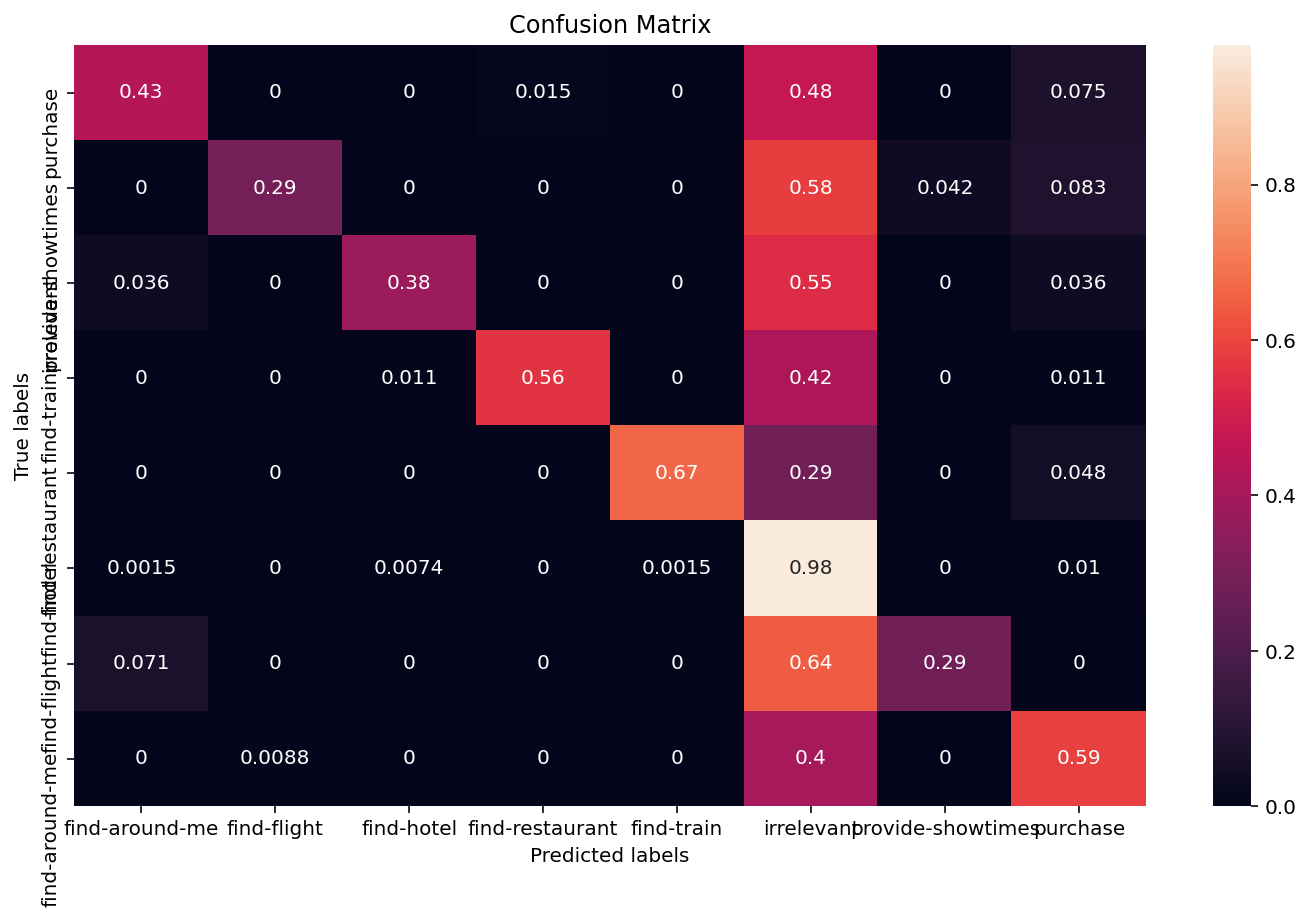

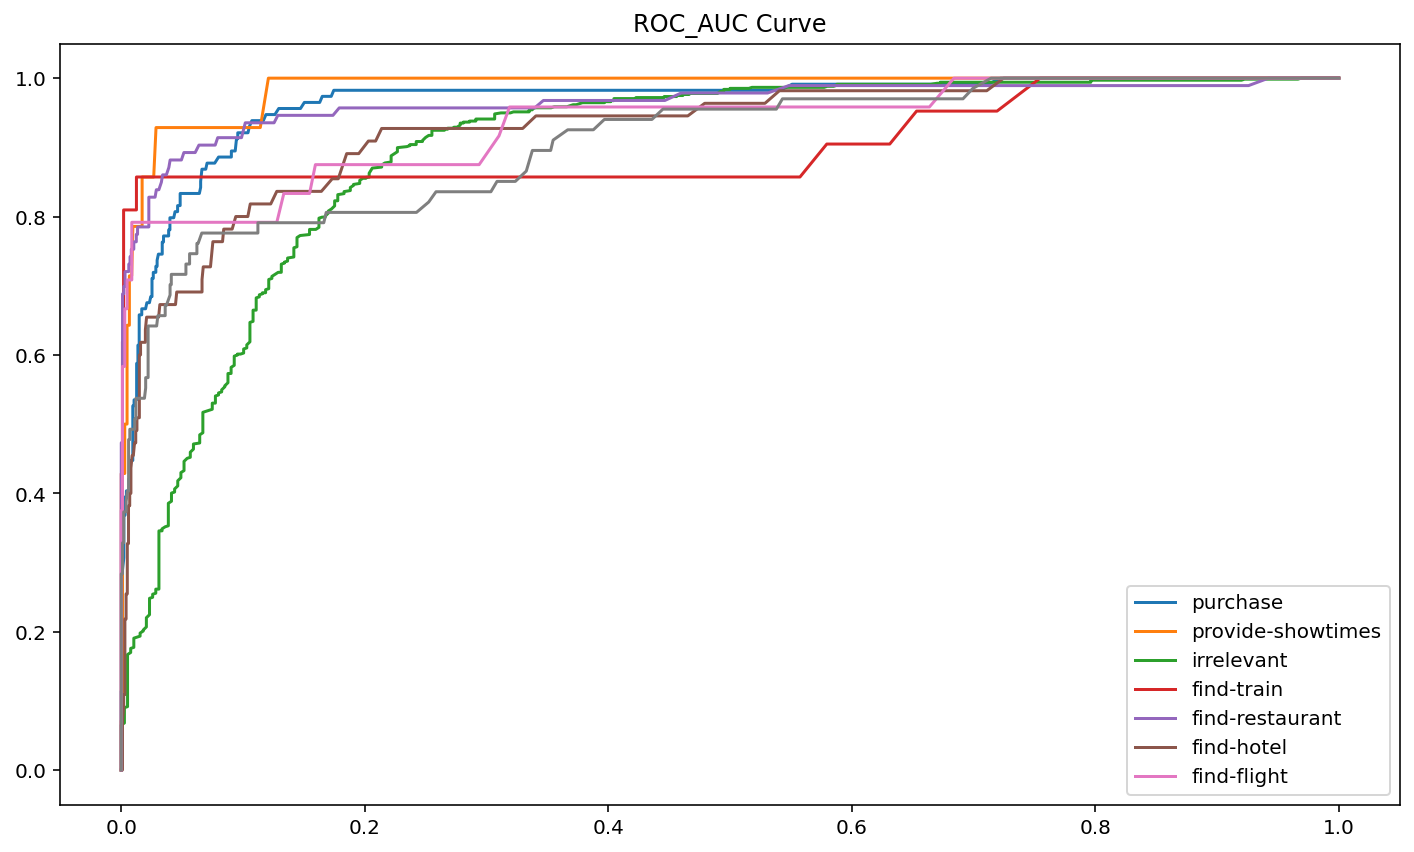

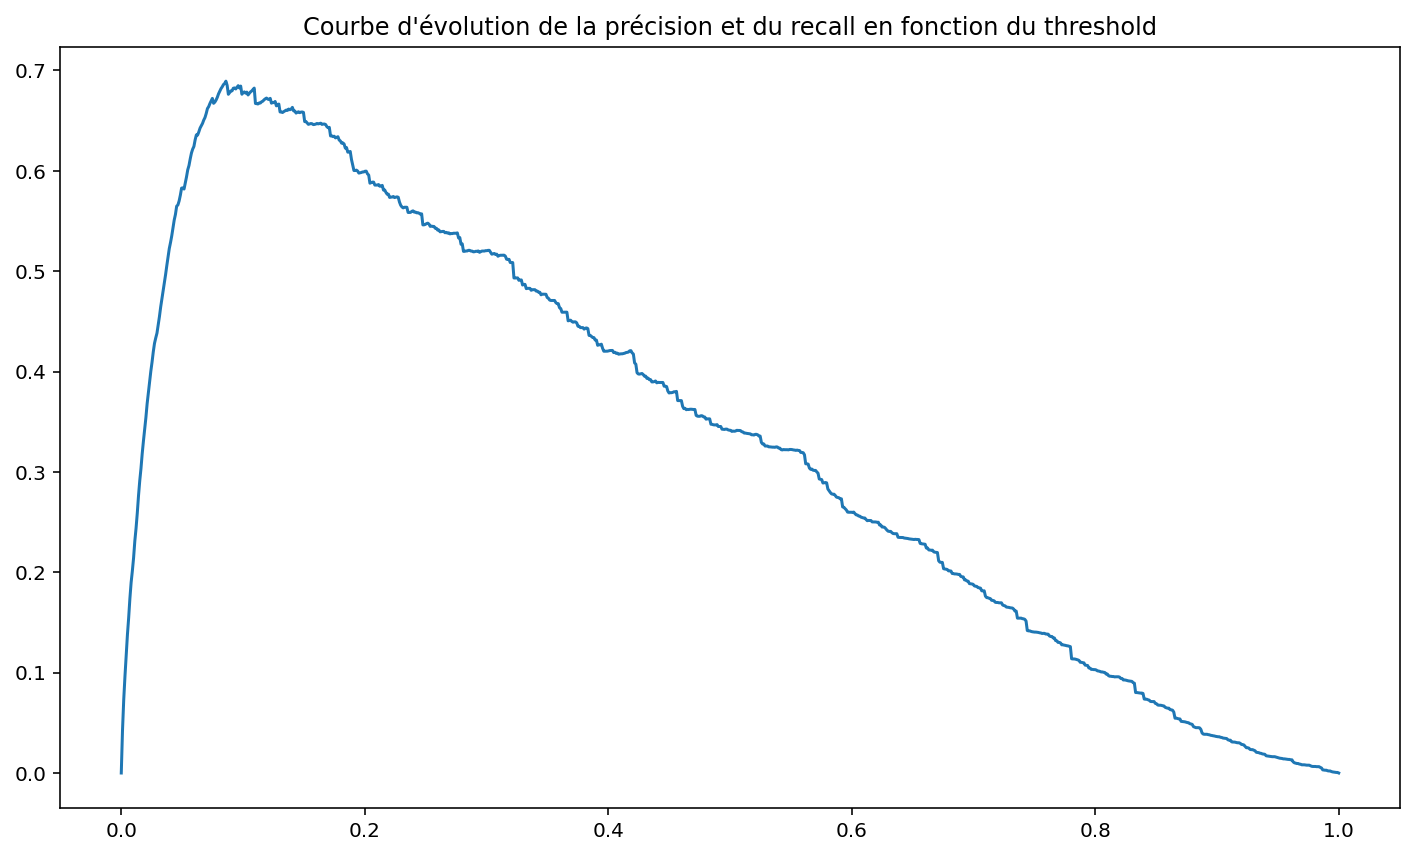

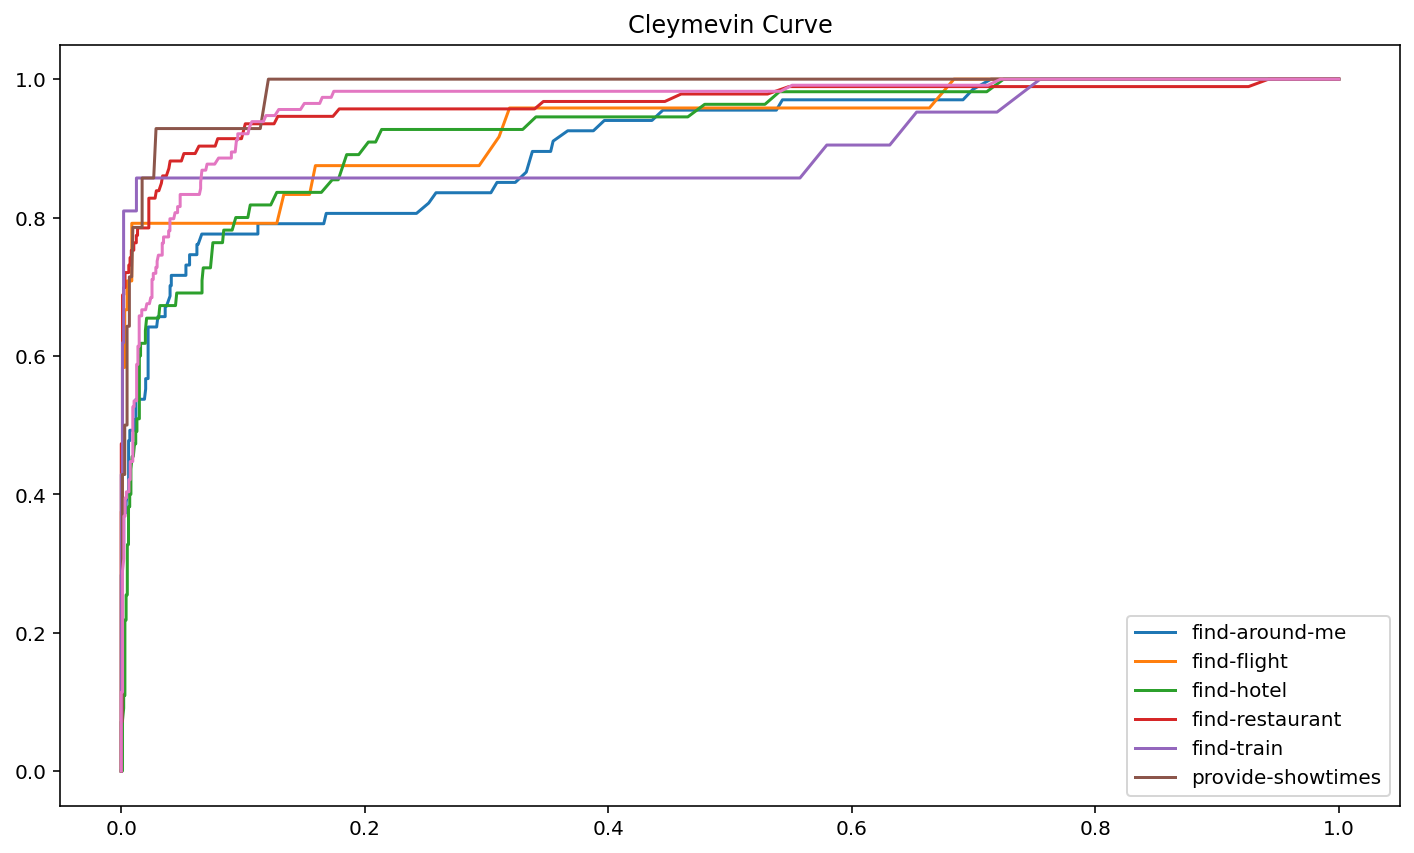

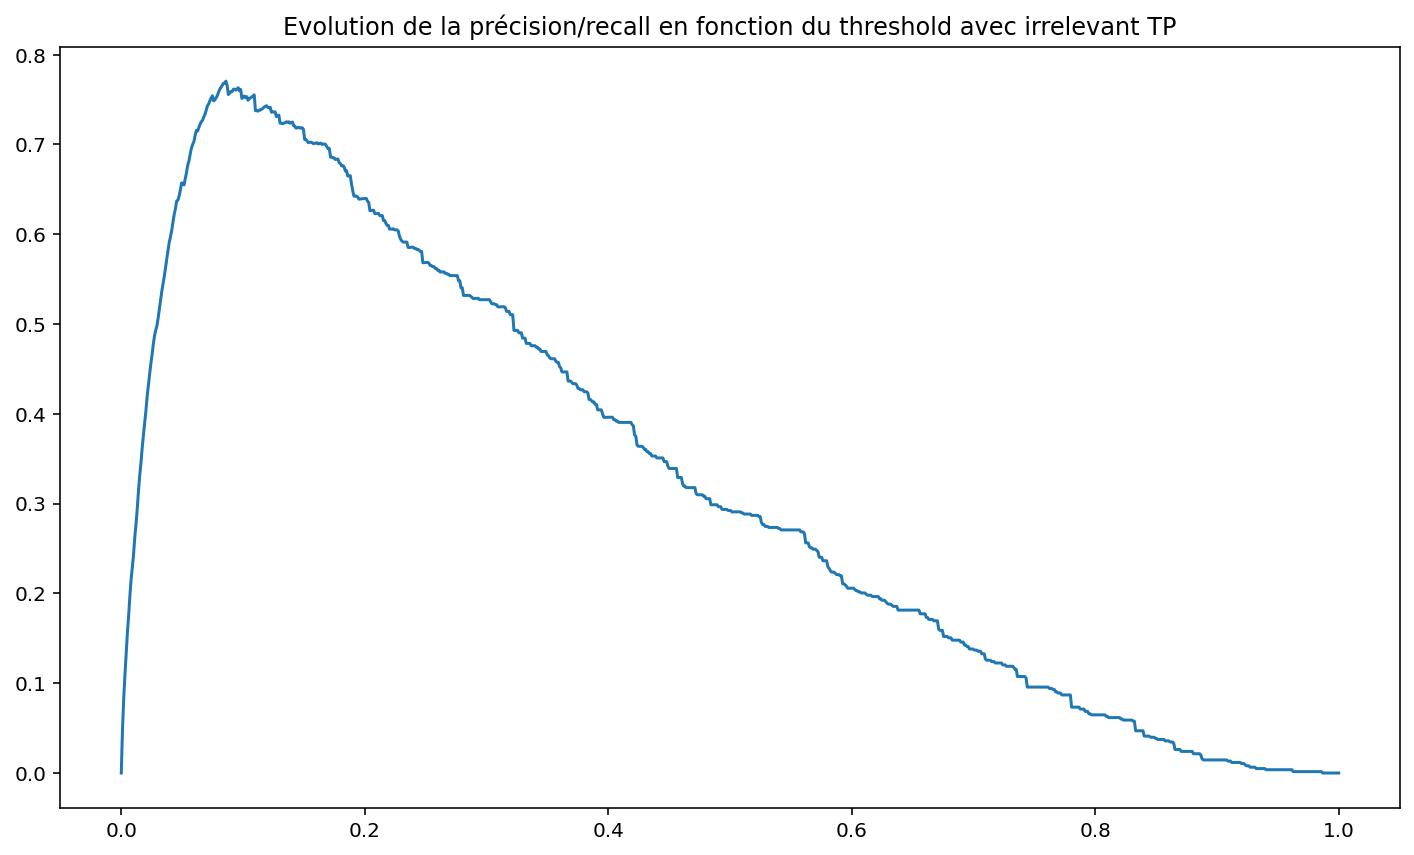

In [6]:
y_pred = []
y_true = []
y_pred_all = []
lst_classe = ["find-around-me","find-flight","find-hotel","find-restaurant","find-train","irrelevant","provide-showtimes","purchase"]
lst_classe_bis = ["find-around-me","find-flight","find-hotel","find-restaurant","find-train","provide-showtimes","purchase"]
pas = 0.001
# On remplit des tableaux explicites pour plus de lisibilité de code
for i in range(len(test_dataset)):
    y_pred.append(get_detected_intent(predictions[i]))
    y_true.append(test_dataset[i]["intent"])
    y_pred_all.append(predictions[i])


compute_scores(y_pred,y_true,lst_classe)
plot_confusion_matrix(y_pred,y_true,lst_classe)
plt.figure()
compute_roc_auc_curve(lst_classe,pas,y_pred_all,y_true)
plt.figure()
Cleymevin_curve(lst_classe_bis,pas,y_pred_all,y_true)

## Exercice 2

#### Objectifs de notre modèle

Notre besoin principal est de ne pas amener l'utilisateur vers un formulaire qui ne correspond pas à son besoin.
Ainsi, si le modèle n'est pas certain de la détection d'une intention, il faut privilégier la classification "irrelevant".
Ce besoin correspond aussi à un taux très faible de faux positif (i.e précision élevée) mais aussi un recall élevé (une classe n'est pas confondue avec une autre).
Il faut alors équilibrer ces métriques.

Afin de déterminer les valeurs de threshold intéressantes nous allons nous appuyer sur les deux métriques que nous avons mis en place dans l'exercice précédent (les courbes ROC-AUC et ROC-AUC modifiée). On rappelle que notre objectif est de classer le plus possible d'intent. Dans cet optique nous allons essayer de rendre le threshold le plus petit possible (de sorte que le plus de phrase possible soit détectée). Cependant si l'on place ce threshold trop bas alors on va classer des intent dont on est pas sûr et on va risquer d'envoyer le mauvais formulaire. Afin d'éviter cela il faut donc essayer d'avoir le threshold le plus élevé possible pour que l'on ne classe pas certaines phrases si l'algorithme n'est pas sûr. L'objectif est donc de trouver le juste milieu entre ces deux problématiques. Nous avons donc mis en place la mesure de metrics appelée gmeans. Cette mesure permet de prendre en compte les TP en essayant de les maximiser et de prendre en compte les FP en essayant de les maximiser (la formule est TP*(1-FP)). Lorsque l'on analyse cette courbe on remarque très clairement un pic sur la valeur 8.6%. Ainsi choisir ce threshold semble donc être un bon choix.


## Exercice 3

In [7]:

# Récupération du jeu de données de prédiction à partir de notre modèle
with open('data/predict2.json', encoding="utf8") as f:
    predictions = json.load(f)
with open('data/testing_set.json', encoding="utf8") as f:
    test_dataset = json.load(f)
with open('data/training_set.json', encoding="utf8") as f:
    training_dataset = json.load(f)

stats_intent = stats_by_intent(test_dataset, predictions)
print_stats_by_intent(stats_intent)

sum_prec = 0
sum_rec = 0
for intent in stats_intent:
    sum_prec += stats_intent[intent]["precision"]
    sum_rec += stats_intent[intent]["recall"]
print("avg precision: ", (sum_prec/len(stats_intent)))
print("avg recall: ", (sum_rec/len(stats_intent)))




                      TP    FP  TP+FN  TP+FP  precision    recall
purchase            80.0  12.0  114.0   92.0   0.869565  0.701754
find-around-me      42.0  24.0   67.0   66.0   0.636364  0.626866
find-restaurant     75.0  11.0   93.0   86.0   0.872093  0.806452
irrelevant         632.0  80.0  677.0  712.0   0.887640  0.933530
provide-showtimes   12.0   4.0   14.0   16.0   0.750000  0.857143
find-flight         18.0   1.0   24.0   19.0   0.947368  0.750000
find-hotel          37.0  14.0   55.0   51.0   0.725490  0.672727
find-train          18.0   5.0   21.0   23.0   0.782609  0.857143
avg precision:  0.8088912049040242
avg recall:  0.7757018672716053


Classe               Precision   Recall    F2Score
--------------------------------------------------
find-around-me   |   0.636364    0.626866  0.628743
find-flight      |   0.947368    0.750000  0.782609
find-hotel       |   0.725490    0.672727  0.682657
find-restaurant  |   0.872093    0.806452  0.818777
find-train       |   0.782609    0.857143  0.841121
irrelevant       |   0.887640    0.933530  0.923977
provide-showtimes|   0.750000    0.857143  0.833333
purchase         |   0.869565    0.701754  0.729927


Best threshold :0.1840242669362993


Best threshold :0.14357937310414562


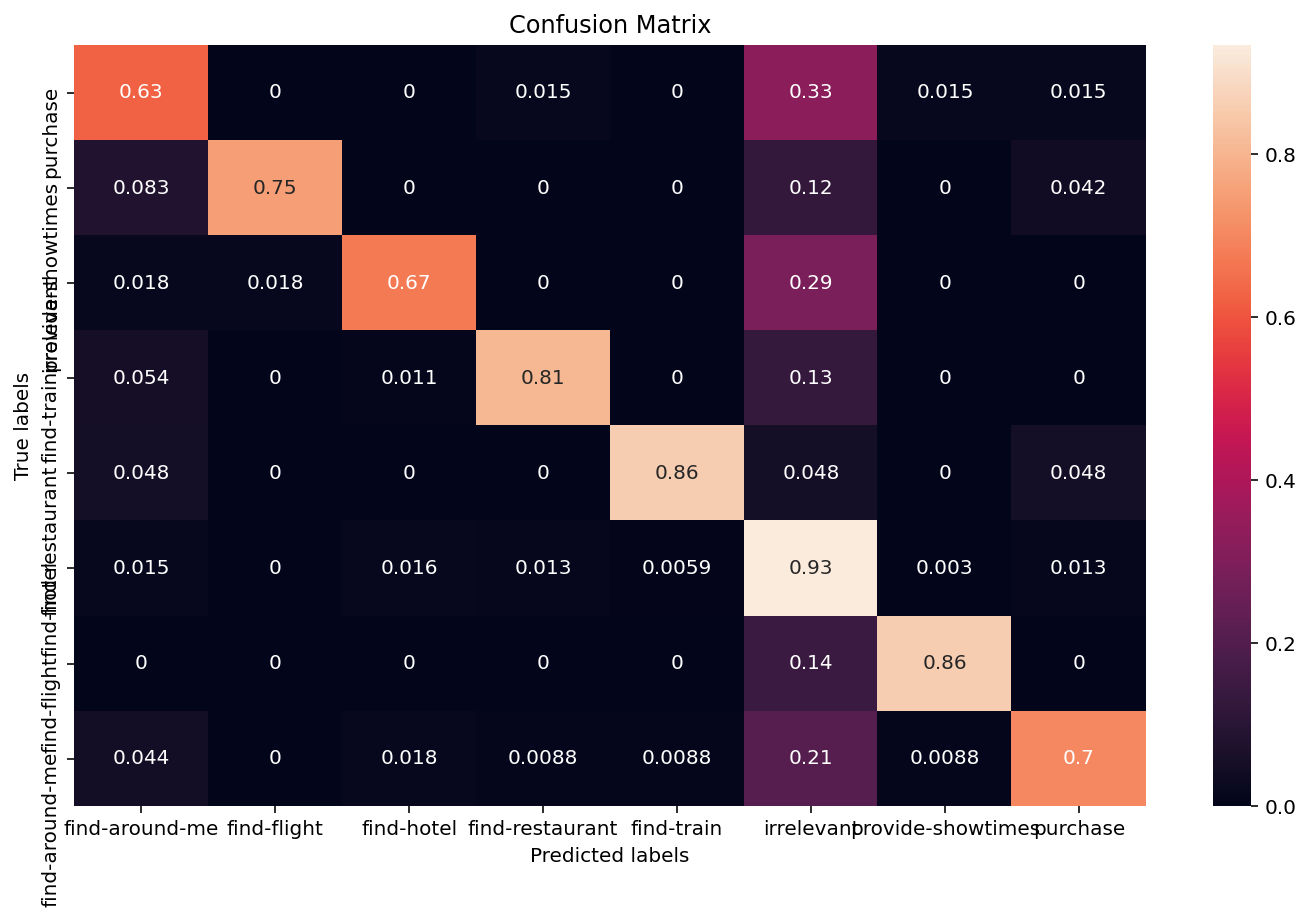

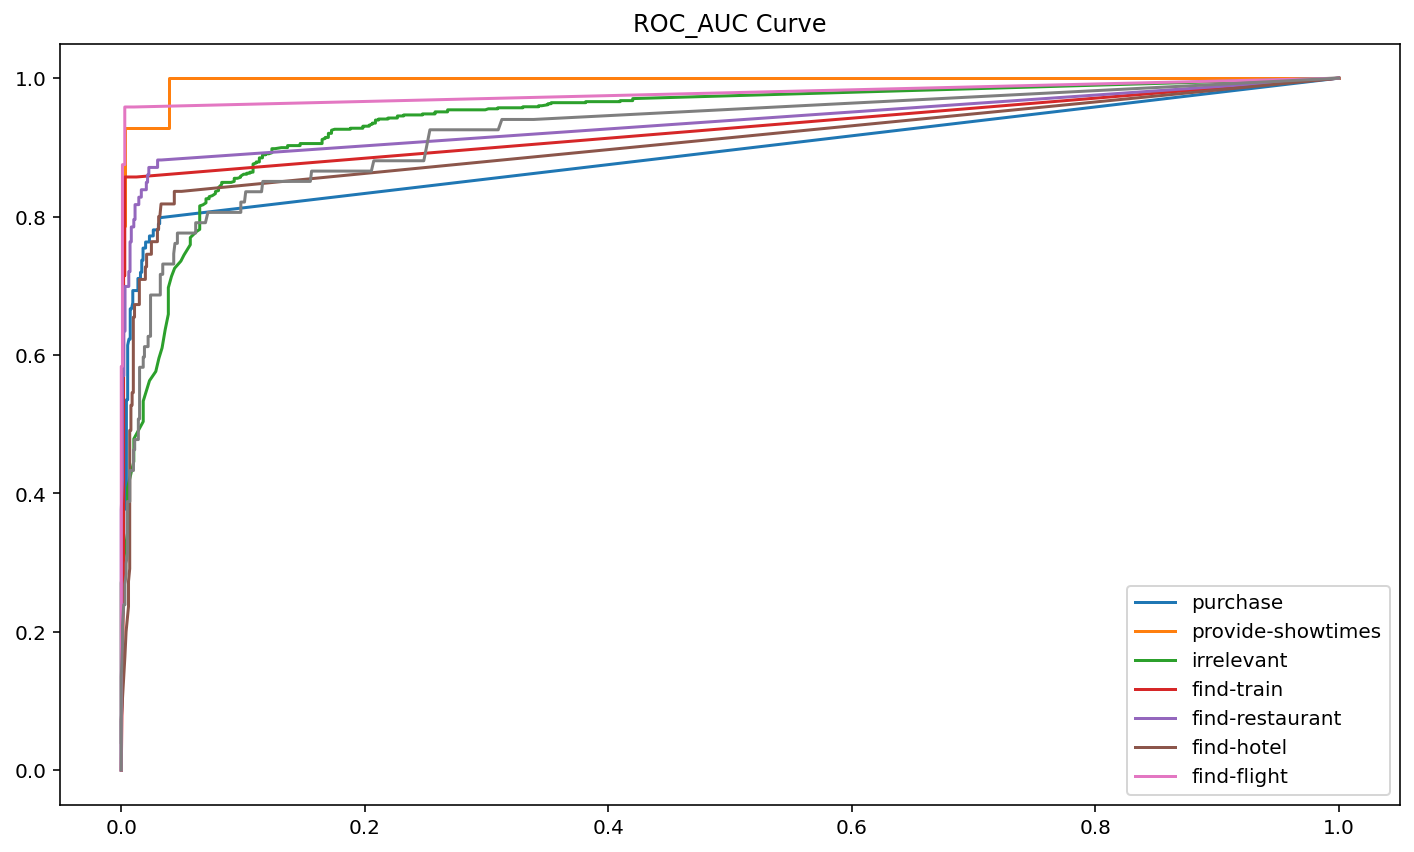

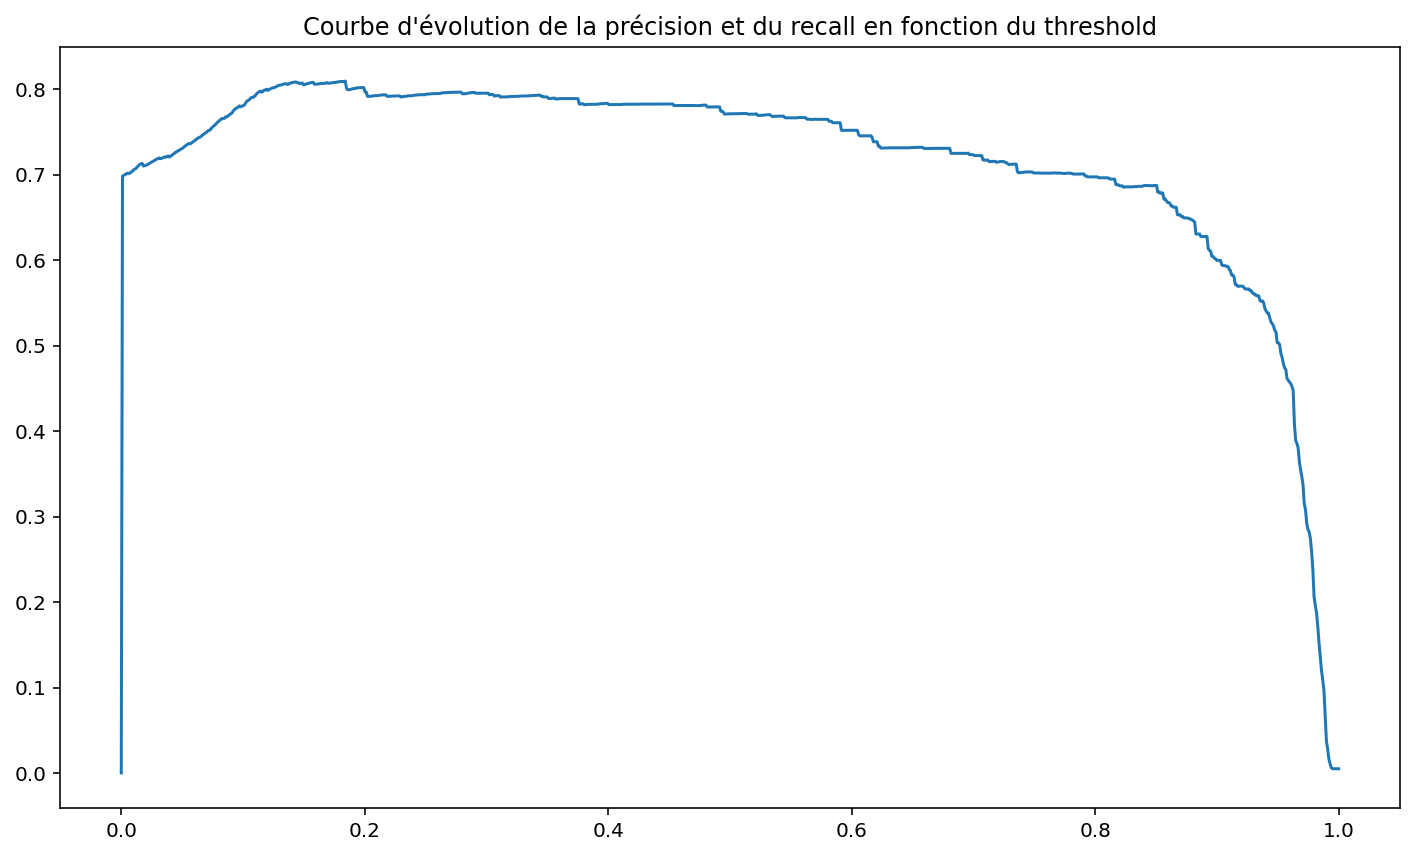

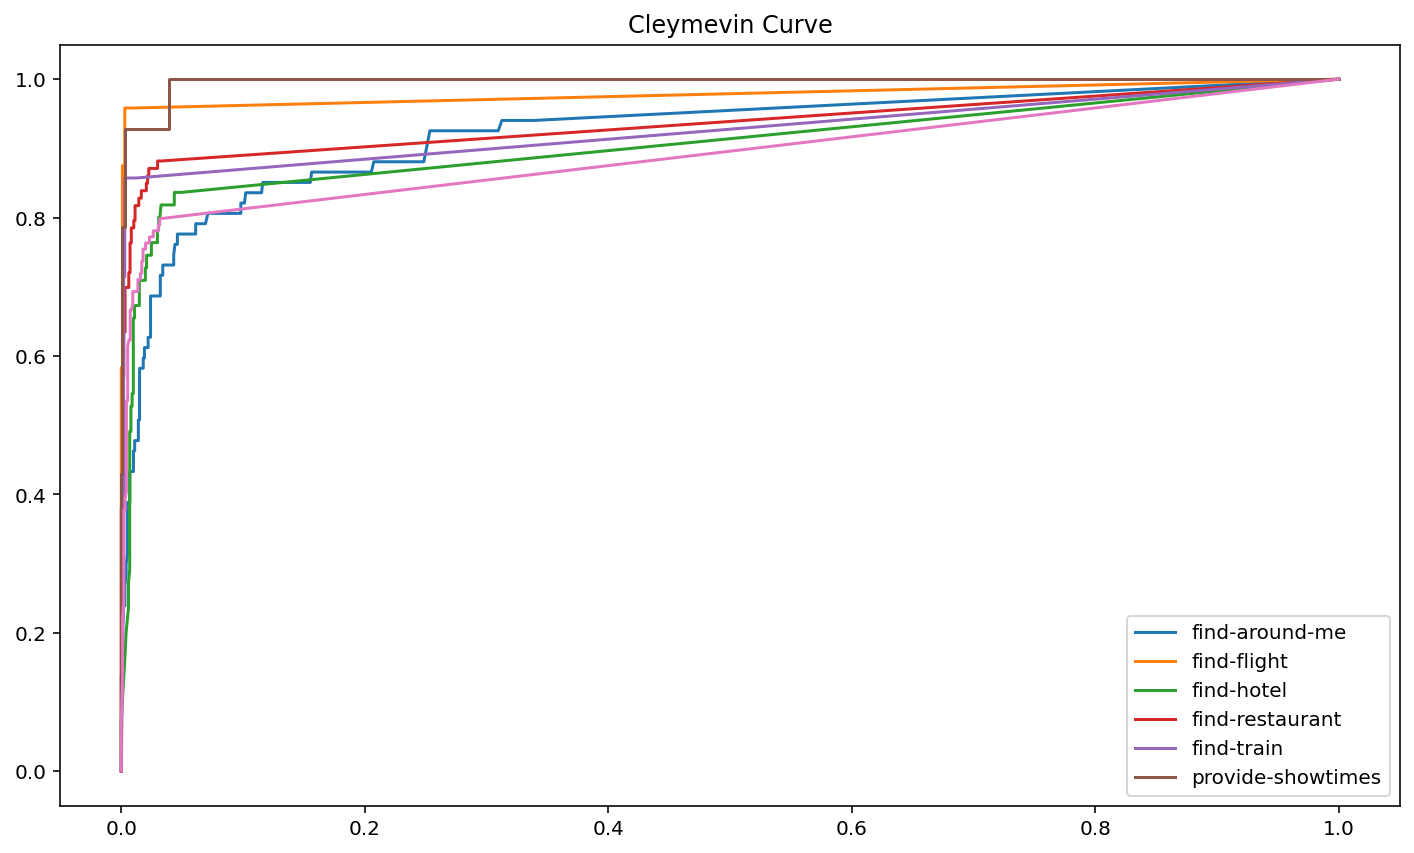

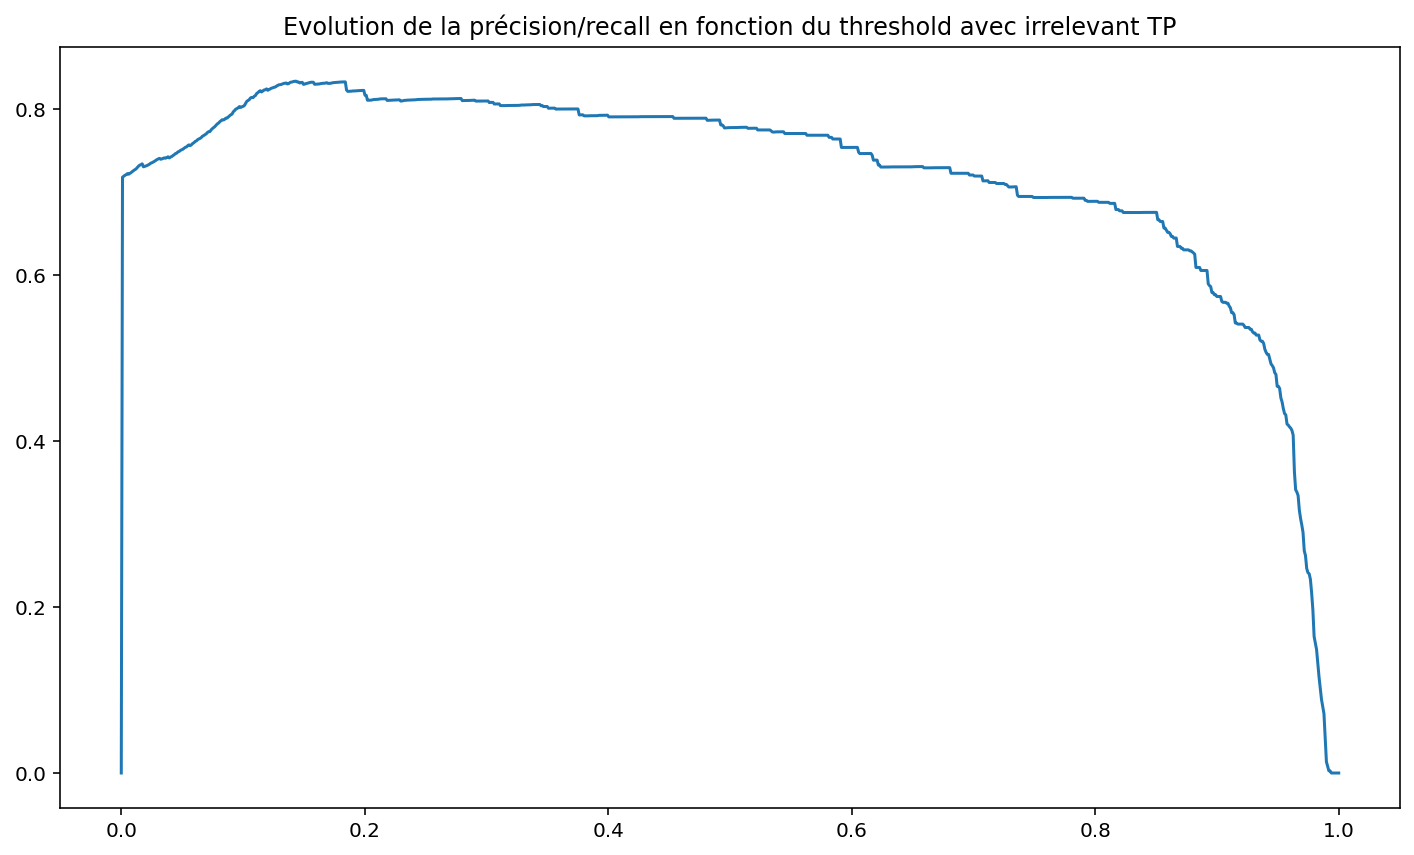

In [8]:
y_pred = []
y_true = []
y_pred_all = []
lst_classe = ["find-around-me","find-flight","find-hotel","find-restaurant","find-train","irrelevant","provide-showtimes","purchase"]
lst_classe_bis = ["find-around-me","find-flight","find-hotel","find-restaurant","find-train","provide-showtimes","purchase"]
pas = 0.001
for i in range(len(test_dataset)):
    y_pred.append(get_detected_intent(predictions[i]))
    y_true.append(test_dataset[i]["intent"])
    y_pred_all.append(predictions[i])


compute_scores(y_pred,y_true,lst_classe)
plot_confusion_matrix(y_pred,y_true,lst_classe)
plt.figure()
compute_roc_auc_curve(lst_classe,pas,y_pred_all,y_true)
plt.figure()
Cleymevin_curve(lst_classe_bis,pas,y_pred_all,y_true)

## Comparaison des deux modèles

Tout d'abord naïvement on pourrait coire que puisque la précision de notre modèle est bien en dessous du modèle de base, le nouveau modèle ne vaut pas un kopeck. Cependant analysons un peu plus en profondeur cette précision. On remarque que l'on perd de la précision sur la classe irrelevant, classe qui représente environ 70% des cas de modèle. Ainsi perdre en précision sur cette classe revient à perdre beaucoup de précision globalement. Si l'on prend les autres classes, en revanche, on remarque que la précision a augmenté significativement. Notre modèle est donc un toute petit peu moins bon pour classer les irrelevan, mais est plus à même de classer les autres messages. Cette caractéristique va de pair avec le recall moyen. En effet le premier modèle renvoyé très souvent irrelevant. Puisque c'est la classe majotitaire il avait très souvent bon. Il délaissait plus souvent les autres classes. Ainsi le recall est lui terrible pour les autres classes. Avec le nouveau modèle, le recall est bien meilleur puisqu'il se trompe beaucoup moins sur les autres classes. La nouvelle matrice de confusion est elle aussi beaucoup plus équilibrée. Les courbes de choix de threshold sur le second modèle sont elles aussi bien plus équilibrée. Cela est dû au fait que, puisque les décisions sont plus réparties on se trompe moins sur les classes autres qu'irrelevant. On remarque aussi que la plupart des courbes ROC-AUC du nouveau modèle sont supérieur à celles de l'ancien. Seule la courbe irrelevant est très légèrement supérieure par endroit. On remarque aussi dans le nouveau modèle que lorsque qu'une classe est mal reconnue il est plutôt rare que l'affectation se fasse dans une classe autre qu'irrelevant. On s'est ici bien plié à la demande client qui est d'éviter le plus possible l'envoi d'un mauvais formulaire. Ainsi, finalement, le second modèle est meilleur selon les différentes métriques que nous avons montrées précédement.

## Exercice 4

### Possibilité d'amélioration

Nous avons remarqué qu'à partir de 500 utilisateurs, avec un taux de demande d'environ 150 requêtes par seconde, l'application commençait tout juste à montrer quelques imperfections. Il s'agit d'un plutôt bon, mais il dépend bien entendu du matériel utilisé. En effet, le test ayant été fait sur un serveur local les capacités de calculs de la machine rentre fortement en compte. 
 * Ainsi on pourrait donc penser en tout premier lieu à faire du scaling vertical. Augmenter les capacités de calcul du PC permettrait de fournir un modèle plus rapide dans ses réponses. 
 * On pourrait aussi envisager du scaling horizontal. Il serait possible de répartir les requêtes sur plusieurs serveurs, et ainsi gagner en rapidité. 
 * Afin d'améliorer la rapidité de notre application nous avons rendu la réponse asynchrone. Grâce à cela l'application n'est pas bloquée dans une boucle et peut se permettre de traiter plusieurs demande à la fois en attendant le résultat d'inférence du modèle. 
 * Améliorer le modèle nous permettrait aussi de répondre à une plus forte demande. Dans le cas où le modèle serait très demandé, il faudrait alors certainement faire un compromis entre la précision du modèle (et donc un nombre conséquent de paramètres) et la rapidité du modèle (et donc un nombre moins élevé de paramètres). On pourrait alors imaginer qu'à la manière de distilBERT qui divise par 5 le nombre de paramètre de BERT mais qui conserve 96% de son efficacité (source Sylvain Hazard =D ), créer un modèle plus rapide (toute proportion gardée) mais qui ne perdrait pas énormément en exactitude.
 * Par ailleurs nous pourrions essayer de prétraiter la phrase afin que le modèle, lorsqu'il reçoit l'encodage, soit beaucoup plus rapide pour donner une réponse. 
 * On pourrait aussi paralléliser sur GPU l'exécution du modèle ce qui aurait pour effet de réduire le temps d'inférence du modèle et ainsi le temps de réponse de l'application dans son entièreté.

<img src="images/report1.PNG">

<img src="images/report2.PNG">

<img src="images/report3.PNG">